<a href="https://colab.research.google.com/github/AnIsAsPe/Recomendaci-n-de-libros-usando-LDA/blob/main/Notebooks/Modelos_generativos_de_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas y Funciones

In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 4.5 MB/s eta 0:00:00


In [2]:

import pandas as pd
import numpy as np

import re               # módulo operaciones expresiones regulares
import operator

import contractions
from collections import Counter
import random

import matplotlib.pyplot as plt


In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [4]:
def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''
  #quitar contracciones
  texto = contractions.fix(texto)

  #Convertir en mínusculas
  texto = texto.lower()

  #Quitar puntuación y números
  texto = re.sub('[^a-z]+', ' ', texto)

  return texto

In [5]:
def obtener_ngramas(texto, N):
    palabras_en_texto = texto.split()

    ngramas = (tuple(palabras_en_texto[i:i+N]) for i in range(len(palabras_en_texto)-N+1))
    return ngramas

# Leer y limpiar texto

obtener archivo [txt](https://github.com/sharanyavb/harry-potter/blob/master/Books_Text/HP1.txt)

In [6]:
!wget https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt

--2025-03-19 01:05:32--  https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492006 (480K) [text/plain]
Saving to: ‘HP1.txt’

HP1.txt             100%[===================>] 480.47K  --.-KB/s    in 0.05s   

2025-03-19 01:05:32 (9.36 MB/s) - ‘HP1.txt’ saved [492006/492006]



In [7]:
libro = leer_libro('/content/HP1.txt')

# lista con cadenas correspondientes al pie de página.
borrar = ['Page | {} Harry Potter and the Philosophers Stone - J.K. Rowling'.format(i)\
         for i in range(2,347)]

for tx in borrar:
    libro = libro.replace(tx, '')

libro[:1500]

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t  

In [8]:
libro_limpio = limpiar_texto(libro)
libro_limpio[:1500]


'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you would expect to be involved in anything strange or mysterious because they just did not hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they did not think they could bear it if anyone found out about the potters mrs potter was mrs dursley s sister but they had not met for several years

<h2> Distribución de probabilidad de las palabras en el libro

In [9]:
palabras_frecuencia = Counter(libro_limpio.split())

# Counter es una "colección" donde los elementos encontrados en
# cualquier objeto iterable son guardados como claves de un
# diccionario y el conteo como valores

palabras_frecuencia

Counter({'the': 3651,
         'boy': 85,
         'who': 200,
         'lived': 9,
         'mr': 81,
         'and': 1935,
         'mrs': 46,
         'dursley': 57,
         'of': 1311,
         'number': 17,
         'four': 36,
         'privet': 16,
         'drive': 20,
         'were': 332,
         'proud': 7,
         'to': 1872,
         'say': 75,
         'that': 688,
         'they': 690,
         'perfectly': 5,
         'normal': 10,
         'thank': 9,
         'you': 1037,
         'very': 172,
         'much': 76,
         'last': 84,
         'people': 96,
         'would': 421,
         'expect': 13,
         'be': 366,
         'involved': 5,
         'in': 967,
         'anything': 72,
         'strange': 23,
         'or': 109,
         'mysterious': 6,
         'because': 91,
         'just': 180,
         'did': 297,
         'not': 1014,
         'hold': 12,
         'with': 416,
         'such': 21,
         'nonsense': 4,
         'was': 1262,
         'd

In [10]:
vocabulario = list(palabras_frecuencia.keys())
print('Palabras en el vocabulario de HP1: ', len(vocabulario))

Palabras en el vocabulario de HP1:  5704


Visualización de la probabilidad de ocurrencia de las 80 palabras más frecuentes

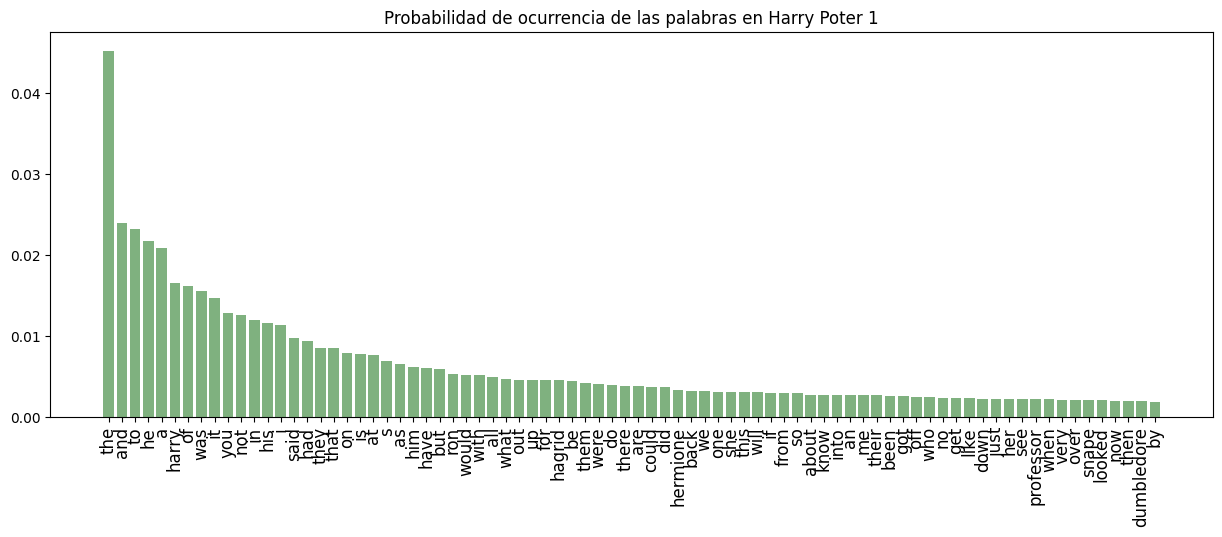

In [11]:
Probabilidad_palabra = {k : v /len(libro_limpio.split()) for k, v in palabras_frecuencia.most_common(80)}

x, y  = zip(*sorted(Probabilidad_palabra.items(),key=operator.itemgetter(1), reverse=True))

fig = plt.figure(figsize=(15,5))
plt.bar(x,y,
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Harry Poter 1')
plt.show()

# Generación de Texto con Distribución Uniforme

1. Declaramos una lista vacía donde guardaremos las palabras que tendra el texto
2. Escojemos la primera palabra de forma aleatoria con distribución uniforme **texto en negrita**

In [23]:
palabras = []  # inicializamos la lista de palabras

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)

' '.join(palabras)

'drills'

In [29]:
long = 10
for _ in range(long):
    palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
    palabras.append(palabra_selec)

' '.join(palabras)

'drills seekers vol tying cornflakes dud spring goblin works cheery prowling spasm astounding hawk gawking sneaked seem armchair library shared seeping scribbled lion less spinnet mist argue settled steady embers conduct dittany sent gliding darkened longingly separated random its weeds sightings collected glee stepped mounting reflections from throw cream belonging poker ghostie tottering trying shabby thundered clinging guide evil fours late'

lo que sería equivalente a lo siguiente:

In [14]:
' '.join(np.random.choice(vocabulario,100))

'gray although whom is studying have foretold full while naturally making sped learn fires beaverskin hatching forgetfulness outta company surrounded bath curry explaining muffled bowling ebony spun capture drive sighed binoculars swore d hermionel dance pig greatness peevsie popped takes nerve tasted puzzlement ta trot scratchy watch time movement unbearable knobbly things that pearly forgive misses pillow broomshed adalbert clasped aaaaaaaaaaargh wrong halloween lived payin deputy papers disgusting smatter pay goodness sight nasty beaming account toppled little up nettle sauce spinach come terrified charm knows pockets columns slightest picked job foretold newscaster transfer g boomed explode ran wrist problem come'

# Generación de Texto con distribucción de palabras en HP

In [30]:
' '.join(random.sample(libro_limpio.split(),100))    # Distribución de palabras en el libro

'of one to potions perfect did every moment lose unicorn dormitory hagrid if at borrowed not as that mark before spread these both the and quirrell making suddenly flute in hidden i then still blown let his pleased mr a to to asked on gasped his look left people still of place fifteen those are and s aha prefect been get outside ceiling and anyone with read it do was could said will seem ordinary chance would lesson ron portrait get minutes us but ron you logic had quirrell they good scar to and go there you flitwick harry all'

# Generación de texto usando N Gramas

In [16]:
unigramas = palabras_frecuencia
print('Unigramas Unicos: ', len(unigramas), end='\n\n')
list(unigramas.items())[:10]

Unigramas Unicos:  5704



[('the', 3651),
 ('boy', 85),
 ('who', 200),
 ('lived', 9),
 ('mr', 81),
 ('and', 1935),
 ('mrs', 46),
 ('dursley', 57),
 ('of', 1311),
 ('number', 17)]

In [17]:
bigramas = Counter(obtener_ngramas(libro_limpio, 2))
print('Bigramas Unicos: ', len(bigramas), end='\n\n')
list(bigramas.items())[:10]

Bigramas Unicos:  41298



[(('the', 'boy'), 27),
 (('boy', 'who'), 7),
 (('who', 'lived'), 3),
 (('lived', 'mr'), 1),
 (('mr', 'and'), 3),
 (('and', 'mrs'), 7),
 (('mrs', 'dursley'), 19),
 (('dursley', 'of'), 1),
 (('of', 'number'), 4),
 (('number', 'four'), 8)]

In [18]:
trigramas = Counter(obtener_ngramas(libro_limpio,3))
print('Trigramas Unicos: ', len(trigramas), end='\n\n')
list(trigramas.items())[:10]

Trigramas Unicos:  69499



[(('the', 'boy', 'who'), 4),
 (('boy', 'who', 'lived'), 2),
 (('who', 'lived', 'mr'), 1),
 (('lived', 'mr', 'and'), 1),
 (('mr', 'and', 'mrs'), 3),
 (('and', 'mrs', 'dursley'), 4),
 (('mrs', 'dursley', 'of'), 1),
 (('dursley', 'of', 'number'), 1),
 (('of', 'number', 'four'), 4),
 (('number', 'four', 'privet'), 1)]

## Crear textos basadas en la probabilidad de ocurrencia

In [19]:
secuencia = 'hola como estas'.split()
secuencia[-1]

'estas'

In [20]:

def probabilidad_bigrama(secuencia):
    if secuencia not in bigramas:
        return 0
    return bigramas[secuencia] / unigramas[secuencia[0]]

def probabilidad_trigrama(secuencia):
    if secuencia not in trigramas:
        return 0
    return trigramas[secuencia] / bigramas[secuencia[:2]]

def selecciona_siguiente_token(secuencia):
    lista_palabras_candidatas = []

    # Itera por todos los tokens del vocabulario
    # calculando la probabilidad de seleccionar la siguiente palabra
    for p in vocabulario:
        Prob1 = unigramas[p] / len(vocabulario)
        Prob2 = probabilidad_bigrama((secuencia[-1], p))
        Prob3 = probabilidad_trigrama((secuencia[-2], secuencia[-1], p)) if len(secuencia) >= 3 else 0

        # Usamos una interpolación lineal
        Probabilidad =  0.05*Prob1 + 0.35*Prob2 + 0.60*Prob3

        lista_palabras_candidatas.append((p, Probabilidad))

    # orenamos la lista de mayor a menor probabilidad
    lista_palabras_candidatas.sort(key=lambda x: x[1], reverse=True)
    return lista_palabras_candidatas[0][0]



In [22]:
palabras = []
longitud_texto = 100

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)

for _ in range(longitud_texto-1):
    palabra_selec = selecciona_siguiente_token(palabras)
    palabras.append(palabra_selec)
" ".join(palabras)

'mangled filch the caretaker to remind you all right said ron and hermione were a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to come and have'